In [12]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import DistanceMetric
from sklearn import preprocessing

In [3]:
class KNNClassifier(object):
    def __init__(self):
        self.X_train = None
        self.y_train = None
        self.k = 1
        self.distance = 'euclidean'

    def any_distance(self, a, b):
        dist = DistanceMetric.get_metric(self.distance)
        matDist = dist.pairwise([a,b])
        return matDist[0,-1]

    def closest(self, row):
        dists = [self.any_distance(row, item) for _,item in self.X_train.iterrows()]
        neighbors = sorted(dists)[:self.k]
        # nei = dists.index(min(dists))
        # print(neighbors)
        
        nei = [dists.index(x) for x in neighbors]
#         print(nei)
        votes = self.y_train.iloc[nei]
        votes = np.array(votes)
#         print(votes)
        label = np.argmax(np.bincount(votes))
        return label

    def fit(self, training_data, training_labels, k=1, distance='euclidean'):
        self.X_train = training_data
        self.y_train = training_labels
        self.k = k
        self.distance = distance

    def predict(self, to_classify):
        print('Predicting...')
        predictions = []
        for _,row in to_classify.iterrows():
            label = self.closest(row)
            #print('Predicted:',label)
            predictions.append(label)
        return predictions

In [4]:
dataset = pd.read_csv('train.csv')
#test.csv file does not have Survived column. Thus, I've prefered to split train.csv.
#test_data = pd.read_csv('test.csv') 

#Removing Non-relevant features
del dataset['Cabin']
del dataset['Ticket']
del dataset['PassengerId']
del dataset['Name']

#Mapping numerical or NaN features values
dataset['Age'] = dataset.Age.fillna(dataset.Age.mean())
dataset = dataset.where((pd.notnull(dataset)), 0)
for row in ["Sex", "Embarked"]:
    dataset[row] = dataset[row].astype('category')
    dataset[row] = dataset[row].cat.codes
datasetCopy = dataset.copy()

#Spliting dataset
list(dataset)
Y = dataset['Survived'].copy()
del dataset['Survived']
X = dataset

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3)



FileNotFoundError: File b'train.csv' does not exist

In [ ]:
knn = KNNClassifier()
knn.fit(X_train, Y_train, k=10, distance='minkowski')
result = knn.predict(X_test)
score = metrics.accuracy_score(y_pred = result, y_true = Y_test)
print(score)

In [16]:
#Correlation analysis
corr = datasetCopy.corr()
corr

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,-0.176509
Pclass,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.173511
Sex,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,0.118492
Age,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.039610
SibSp,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,0.071480
Parch,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,0.043351
Fare,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,-0.230365
Embarked,-0.176509,0.173511,0.118492,-0.039610,0.071480,0.043351,-0.230365,1.000000


In [17]:
#Dataset Normalization
datasetNorm = pd.DataFrame(preprocessing.scale(dataset))

In [18]:
datasetNorm.head()

,0,1,2,3,4,5,6
0,0.827377,0.737695,-0.592481,0.432793,-0.473674,-0.502445,0.587966
1,-1.566107,-1.355574,0.638789,0.432793,-0.473674,0.786845,-1.912644
2,0.827377,-1.355574,-0.284663,-0.474545,-0.473674,-0.488854,0.587966
3,-1.566107,-1.355574,0.407926,0.432793,-0.473674,0.420730,0.587966
4,0.827377,0.737695,0.407926,-0.474545,-0.473674,-0.486337,0.587966


In [19]:
#Features Scaling such that the more strongly correlated a feature is with Y, 
#then the more the feature will influence in the distance
datasetNorm[0] *= np.absolute(corr['Survived']['Pclass'])
datasetNorm[1] *= np.absolute(corr['Survived']['Sex'])
datasetNorm[2] *= np.absolute(corr['Survived']['Age'])
datasetNorm[3] *= np.absolute(corr['Survived']['SibSp'])
datasetNorm[4] *= np.absolute(corr['Survived']['Parch'])
datasetNorm[5] *= np.absolute(corr['Survived']['Fare'])
datasetNorm[6] *= np.absolute(corr['Survived']['Embarked'])

In [20]:
datasetNorm.head()

,0,1,2,3,4,5,6
0,0.280052,0.400828,-0.041360,0.015287,-0.038666,-0.129282,0.103781
1,-0.530097,-0.736553,0.044593,0.015287,-0.038666,0.202460,-0.337599
2,0.280052,-0.736553,-0.019872,-0.016762,-0.038666,-0.125785,0.103781
3,-0.530097,-0.736553,0.028477,0.015287,-0.038666,0.108257,0.103781
4,0.280052,0.400828,0.028477,-0.016762,-0.038666,-0.125138,0.103781


In [21]:
X = datasetNorm
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25)

In [ ]:
knn = KNNClassifier()
knn.fit(X_train, Y_train, k=10, distance='euclidean')
result = knn.predict(X_test)
score = metrics.accuracy_score(y_pred = result, y_true = Y_test)
print(score)

In [23]:
knn = KNNClassifier()
accuracies = []

for i in range(0,30):
    k = 1 + i*4
    kRange.append(k)
    knn.fit(X_train, Y_train, k=k, distance='euclidean')
    result = knn.predict(X_test)
    score = metrics.accuracy_score(y_pred = result, y_true = Y_test)
    print('K=', k, ' Score=', score)
    accuracies.append(score)

Predicting...
K= 1  Score= 0.766816143498
Predicting...
K= 5  Score= 0.820627802691
Predicting...
K= 9  Score= 0.816143497758
Predicting...
K= 13  Score= 0.816143497758
Predicting...
K= 17  Score= 0.820627802691
Predicting...
K= 21  Score= 0.820627802691
Predicting...
K= 25  Score= 0.820627802691
Predicting...
K= 29  Score= 0.816143497758
Predicting...
K= 33  Score= 0.816143497758
Predicting...
K= 37  Score= 0.816143497758
Predicting...
K= 41  Score= 0.816143497758
Predicting...
K= 45  Score= 0.816143497758
Predicting...
K= 49  Score= 0.816143497758
Predicting...
K= 53  Score= 0.816143497758
Predicting...
K= 57  Score= 0.816143497758
Predicting...
K= 61  Score= 0.816143497758
Predicting...
K= 65  Score= 0.811659192825
Predicting...
K= 69  Score= 0.811659192825
Predicting...
K= 73  Score= 0.816143497758
Predicting...
K= 77  Score= 0.816143497758
Predicting...
K= 81  Score= 0.820627802691
Predicting...
K= 85  Score= 0.820627802691
Predicting...
K= 89  Score= 0.820627802691
Predicting...


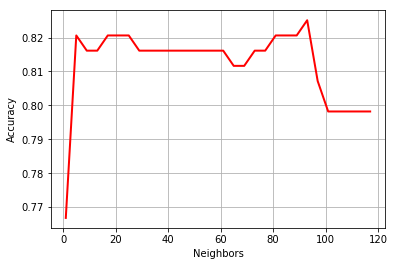

In [26]:
fig,ax = plt.subplots()
ax.plot([1+4*i for i in range(0,30)],accuracies,'r',linewidth=2)
ax.set_ylabel('Accuracy')
ax.set_xlabel('Neighbors')

plt.grid()

In [27]:
highestAcc = max(accuracies)
bestK = accuracies.index(highestAcc)*4 + 1

knn.fit(X_train, Y_train, k=bestK, distance='euclidean')
result = knn.predict(X_test)
score = metrics.accuracy_score(y_pred = result, y_true = Y_test)
score

Predicting...


0.82511210762331844

In [31]:
print(metrics.classification_report(result, Y_test))

             precision    recall  f1-score   support

          0       0.93      0.81      0.87       156
          1       0.66      0.87      0.75        67

avg / total       0.85      0.83      0.83       223

